In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20191125

@author: zhangji

test the linear relationship
U_t =?= U_sh + U_wm
U_t is the total velocity
U_sh is the velocity induced by shear flow
U_wm is the active velocity. 
"""

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

import os
import glob
import re
import pandas as pd
from scanf import scanf
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, spatial, sparse, optimize
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pickle

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import colorbar
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from time import time
from src import support_class as spc
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook

%matplotlib inline
params = {'animation.html': 'html5',
          'font.family':    'sans-serif'}
params['text.latex.preamble'] = [r'\usepackage{bm}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{amssymb}',
                                 r'\usepackage{mathrsfs}',
                                 r'\usepackage{siunitx}',
                                 r'\DeclareMathOperator{\Tr}{Tr}', ]
params['text.usetex'] = True
plt.rcParams.update(params)
fontsize = 40
figsize = (30, 16)
PWD = os.getcwd()

## sketch of base flows

(0.0, 1.0, 0.0, 1.0)

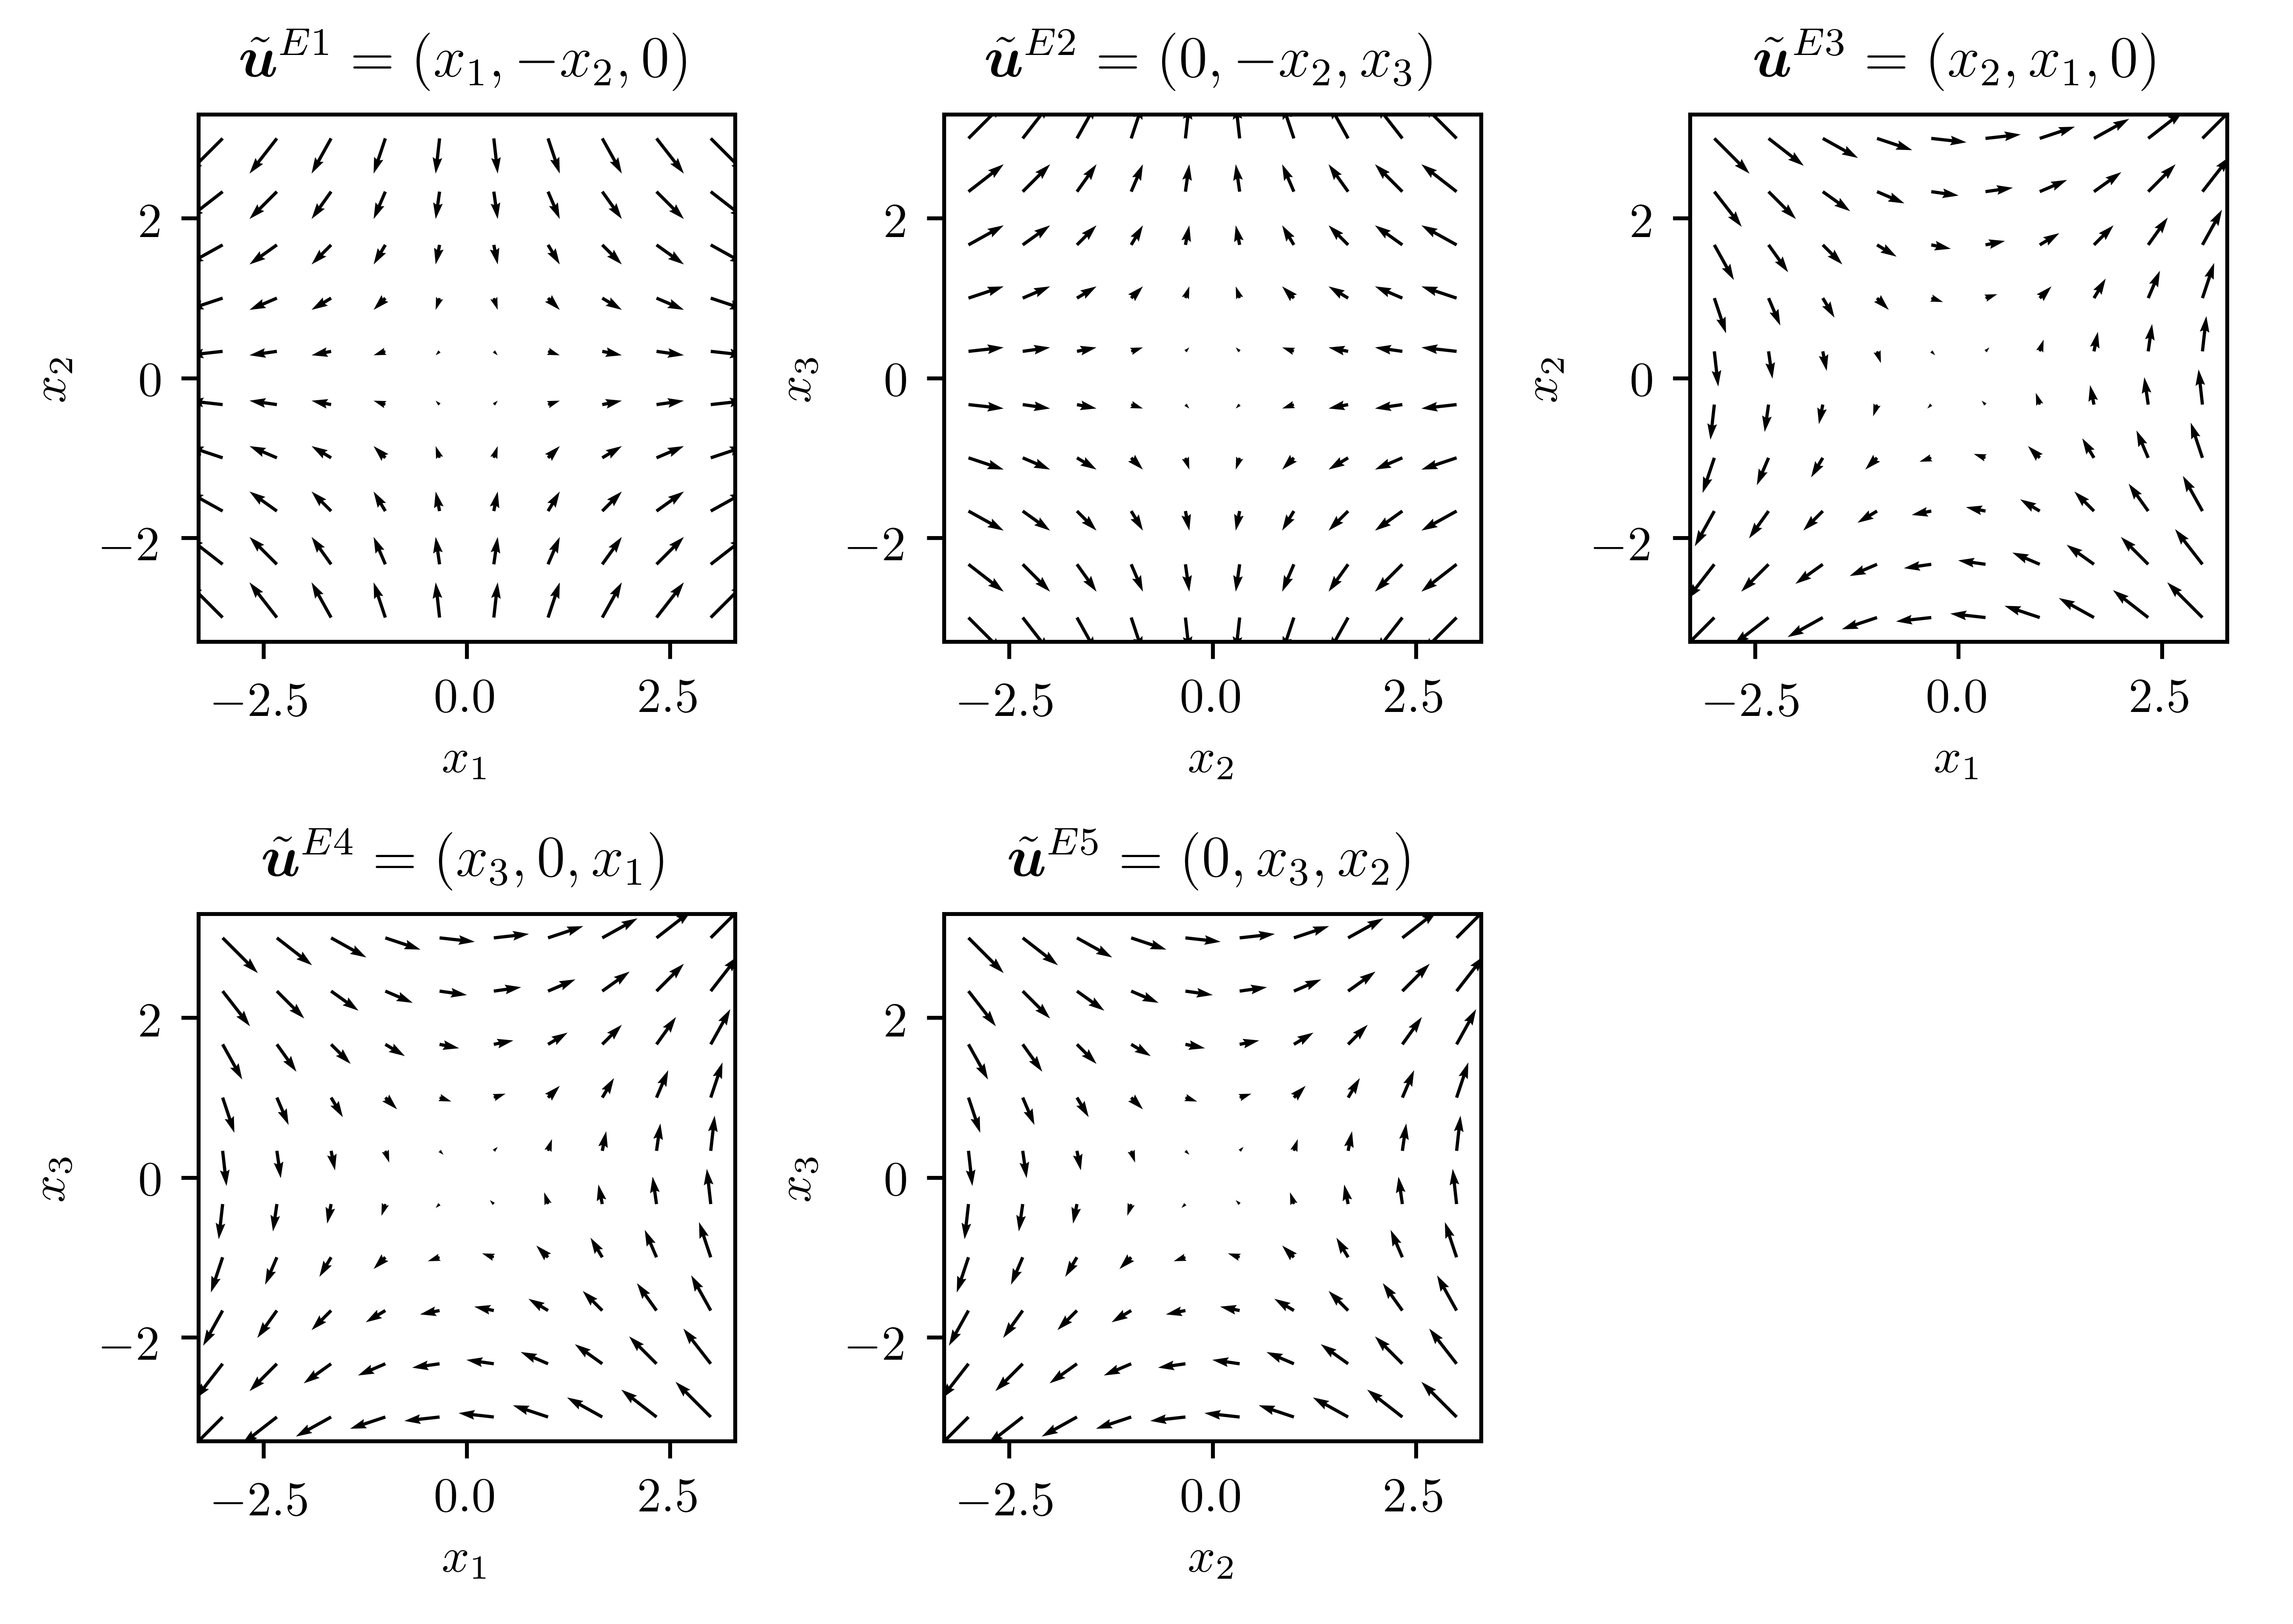

In [24]:
figsize = np.array((12.8, 9)) * 0.5
dpi = 800
t1, t2 = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10), indexing='ij')

fig, axs = plt.subplots(2, 3, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

for axi, xlabel, ylabel, title, tux, tuy in zip(axs.ravel(), 
                                                ('$x_1$', '$x_2$', '$x_1$', '$x_1$', '$x_2$'), 
                                                ('$x_2$', '$x_3$', '$x_2$', '$x_3$', '$x_3$'), 
                                                ('$\\tilde{\\bm u}^{E1} = (x_1, -x_2, 0)$', 
                                                 '$\\tilde{\\bm u}^{E2} = (0, -x_2, x_3)$', 
                                                 '$\\tilde{\\bm u}^{E3} = (x_2, x_1, 0)$', 
                                                 '$\\tilde{\\bm u}^{E4} = (x_3, 0, x_1)$', 
                                                 '$\\tilde{\\bm u}^{E5} = (0, x_3, x_2)$'), 
                                                 (t1, -t1, t2, t2, t2), 
                                                 (-t2, t2, t1, t1, t1), ):
    axi.quiver(t1, t2, tux, tuy, color='k')
    axi.set_xlabel(xlabel)
    axi.set_ylabel(ylabel)
    axi.set_title(title)
# axs[1, 2].set_visible(False)
axs[1, 2].axis('off')



(0.0, 1.0, 0.0, 1.0)

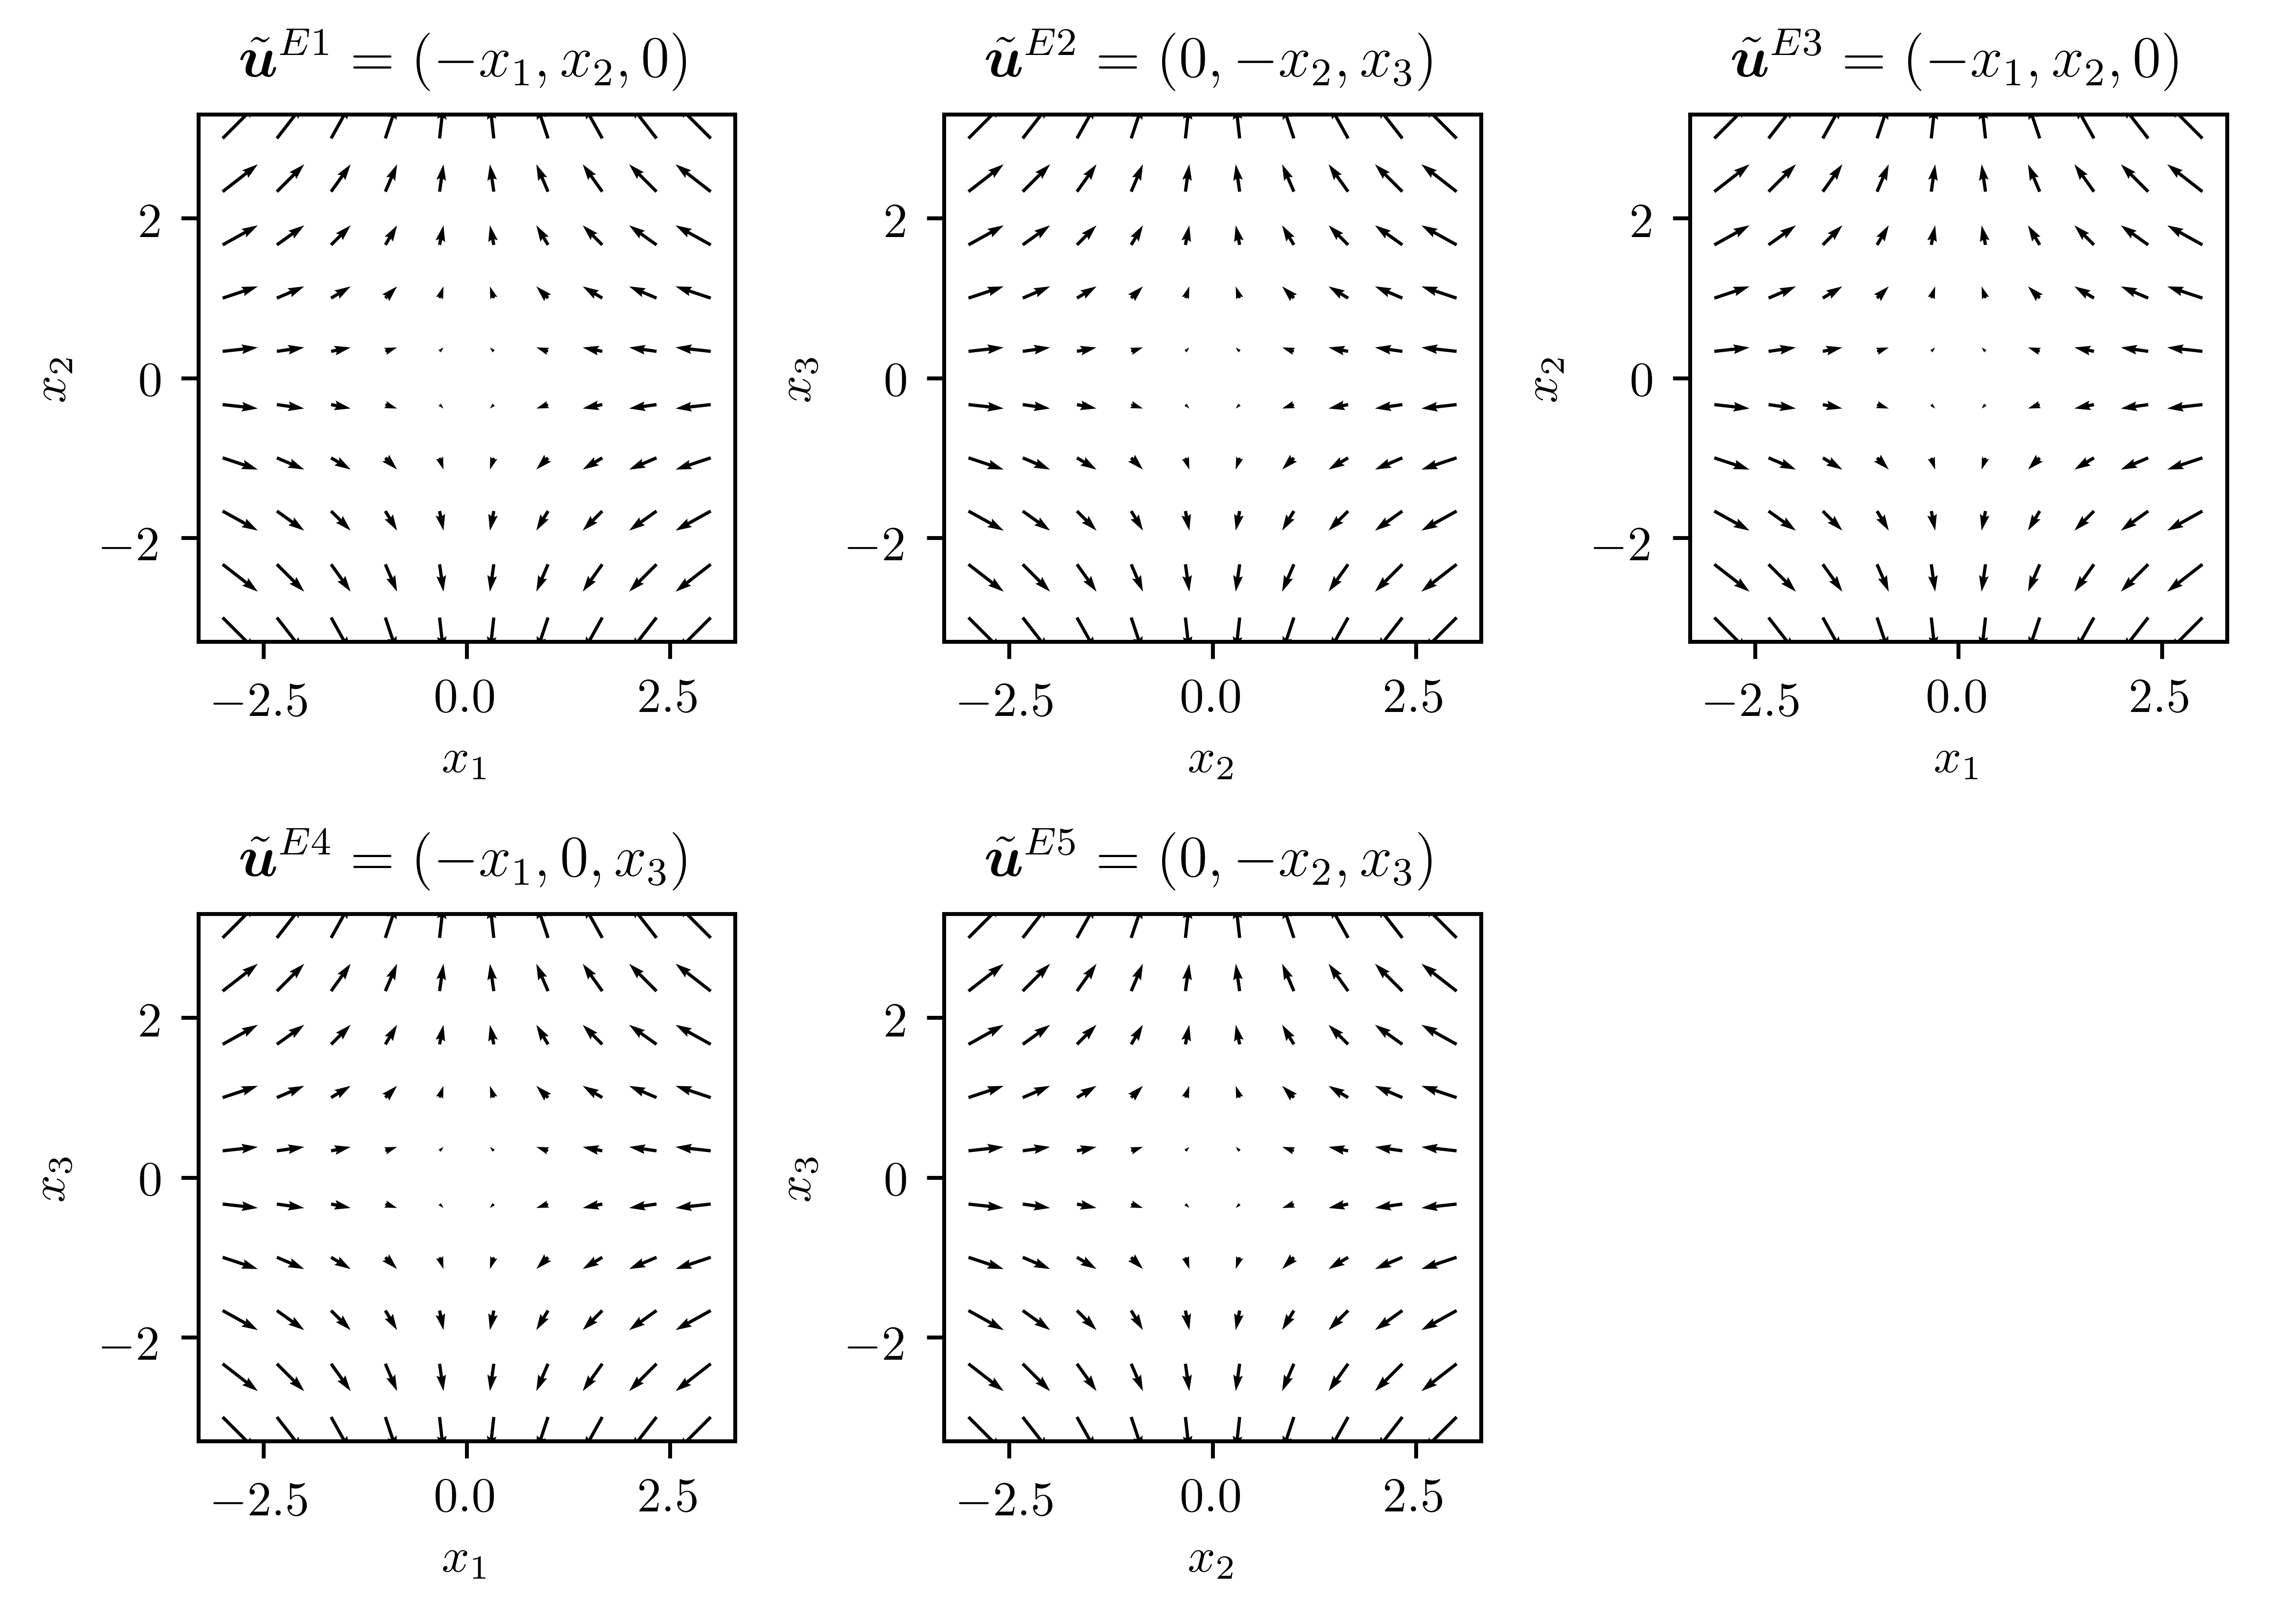

In [13]:
figsize = np.array((12.8, 9)) * 0.5
dpi = 800
t1, t2 = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10), indexing='ij')

fig, axs = plt.subplots(2, 3, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

for axi, xlabel, ylabel, title, tux, tuy in zip(axs.ravel(), 
                                                ('$x_1$', '$x_2$', '$x_1$', '$x_1$', '$x_2$'), 
                                                ('$x_2$', '$x_3$', '$x_2$', '$x_3$', '$x_3$'), 
                                                ('$\\tilde{\\bm u}^{E1} = (-x_1, x_2, 0)$', 
                                                 '$\\tilde{\\bm u}^{E2} = (0, -x_2, x_3)$', 
                                                 '$\\tilde{\\bm u}^{E3} = (-x_1, x_2, 0)$', 
                                                 '$\\tilde{\\bm u}^{E4} = (-x_1, 0, x_3)$', 
                                                 '$\\tilde{\\bm u}^{E5} = (0, -x_2, x_3)$'), 
                                                 (-t1, -t1, -t1, -t1, -t1), 
                                                 ( t2, t2,  t2,  t2,  t2), ):
    axi.quiver(t1, t2, tux, tuy, color='k')
    axi.set_xlabel(xlabel)
    axi.set_ylabel(ylabel)
    axi.set_title(title)
# axs[1, 2].set_visible(False)
axs[1, 2].axis('off')



[[   0.00000   -1.00000]
 [   1.00000    0.00000]]


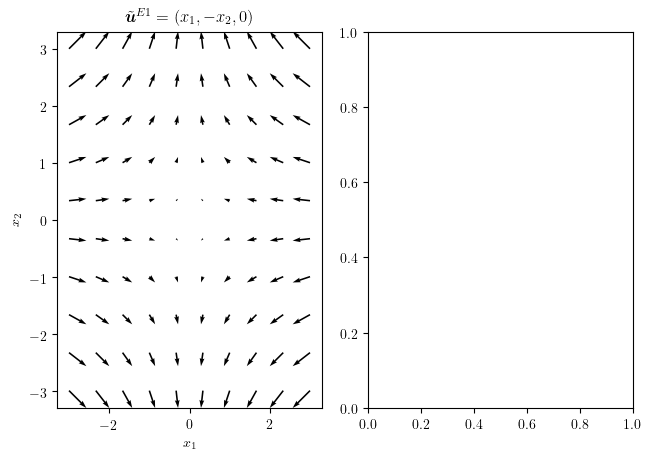

In [11]:
figsize = np.array((12.8, 9)) * 0.5
dpi = 100
t1, t2 = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10), indexing='ij')

fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

rot_th = -np.pi / 2
rotM = np.array(((np.cos(rot_th), np.sin(rot_th), ), (-np.sin(rot_th), np.cos(rot_th))))
print(rotM)
for axi, xlabel, ylabel, title, tux0, tuy0 in zip(axs.ravel(), 
                                                ('$x_1$', '$x_2$', '$x_1$', '$x_1$', '$x_2$'), 
                                                ('$x_2$', '$x_3$', '$x_2$', '$x_3$', '$x_3$'), 
                                                ('$\\tilde{\\bm u}^{E1} = (x_1, -x_2, 0)$', 
                                                 '$\\tilde{\\bm u}^{E2} = (0, -x_2, x_3)$', 
                                                 '$\\tilde{\\bm u}^{E3} = (x_2, x_1, 0)$', 
                                                 '$\\tilde{\\bm u}^{E4} = (x_3, 0, x_1)$', 
                                                 '$\\tilde{\\bm u}^{E5} = (0, x_3, x_2)$'), 
                                                 (t2, ), 
                                                 (t1, ), ):
    tux = tux0 * rotM[0, 0] + tuy0 * rotM[0, 1]
    tuy = tux0 * rotM[1, 0] + tuy0 * rotM[1, 1]
    axi.quiver(t1, t2, tux, tuy, color='k')
    axi.set_xlabel(xlabel)
    axi.set_ylabel(ylabel)
    axi.set_title(title)



In [8]:
np.array(((np.cos(np.pi / 4), np.sin(np.pi / 4), ), (-np.sin(np.pi / 4), np.cos(np.pi / 4))))

array([[   0.70711,    0.70711],
       [  -0.70711,    0.70711]])

## averange error of chirality

In [3]:
# full version
omega_fun = lambda theta, phi, psi, wE2z, wE4x, wE4y, wax, way, waz: np.array((-(np.sin(phi)*(way*np.cos(psi) + wax*np.sin(psi))) + np.cos(phi)*(wax*np.cos(psi)*np.cos(theta) - way*np.cos(theta)*np.sin(psi) + waz*np.sin(theta)) + (np.cos(phi)**2*np.cos(theta)*(wE2z + (-wE2z + wE4x)*np.cos(2*theta)) + wE4x*np.cos(theta)*np.sin(phi)**2 + wE4y*np.cos(phi)*np.sin(phi)*np.sin(theta)**2)/2.,(1 + wE4y*np.cos(phi)**2*np.cos(2*theta) + 2*np.cos(phi)*(way*np.cos(psi) + wax*np.sin(psi)) + np.cos(theta)*np.sin(phi)*(2*wax*np.cos(psi) + wE4y*np.cos(theta)*np.sin(phi) - 2*way*np.sin(psi)) + 2*waz*np.sin(phi)*np.sin(theta) + (wE2z - wE4x)*np.cos(theta)*np.sin(2*phi)*np.sin(theta)**2)/2.,((-2*wax*np.cos(psi) + np.cos(phi)*(wE2z + (wE2z - wE4x)*np.cos(2*theta)) + 2*way*np.sin(psi))*np.sin(theta))/2. + np.cos(theta)*(waz - (wE4y*np.sin(phi)*np.sin(theta))/2.)))
dthdphdps_fun = lambda theta, phi, psi, wE2z, wE4x, wE4y, wax, way, waz: np.array(((np.cos(phi) + 2*way*np.cos(psi) + wE4y*np.cos(phi)*np.cos(2*theta) - wE4x*np.cos(theta)*np.sin(phi) + 2*wax*np.sin(psi))/2.,(-((1 + wE4y)/np.tan(theta)*np.sin(phi)) - 1/np.sin(theta)*(2*wax*np.cos(psi) + wE4x*np.cos(phi)*np.cos(2*theta) - 2*way*np.sin(psi)))/2.,(4*waz + 4*wax*np.cos(psi)/np.tan(theta) + 2*np.cos(phi)*(wE2z + (-wE2z + wE4x)*np.cos(2*theta))/np.tan(theta) + wE4y*np.cos(theta)/np.tan(theta)*np.sin(phi) + 2/np.sin(theta)*np.sin(phi) + wE4y/np.sin(theta)*np.sin(phi) - 4*way/np.tan(theta)*np.sin(psi) - wE4y*np.sin(phi)*np.sin(theta))/4.))

name_handel = 'ecoC01B05_baseFlow_a'
# # for toy model
wE2z, wE4x, wE4y = 0.0126459, -0.01194913, 0.9581018 # ecoC01B05_baseFlow_avr
wax, way, waz = -1.31786126e-03, -1.23559401e-03, -7.57100877e-01 # ecoC01B05_baseFlow_avr
wt = 0
psi = 0
theta = np.linspace(0, 1, 16) * np.pi
phi = np.linspace(0, 2, 31) * np.pi
theta, phi = np.meshgrid(theta, phi)

# # for simulation
# t_theta, t_phi, t_psi = 0, 0, 0
t_theta, t_phi, t_psi = 1.629, (2 * np.pi - 4.300), 3.222,
max_t = 2000
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = 1
table_name1 = 'ecoC01B05_baseFlow'
table_name2 = 'ecoC01B05_baseFlow_avr'
omega_tail_list = np.array((0, 1, 10, 100))
# omega_tail_list = np.array((0, 0, 0, 0))
flow_strength = 1

# # omega_c version
# dthphpsM = np.array(((-np.sin(phi), np.cos(phi), 0), 
#                      (-np.cos(phi) / np.tan(theta), -np.sin(phi) / np.tan(theta), 1), 
#                      (np.cos(phi) / np.sin(theta), np.sin(phi) / np.sin(theta), 0)))
# omega = omega_fun(theta, phi, psi, wE2z, wE4x, wE4y, wax * wt, way * wt, waz * wt)
# dth = np.sum([dthphpsM[0, i0] * omega[i0] for i0 in range(3)], axis=0)
# dph = np.sum([dthphpsM[1, i0] * omega[i0] for i0 in range(3)], axis=0)
# dps = np.sum([dthphpsM[2, i0] * omega[i0] for i0 in range(3)], axis=0)

# dthdphdps version
dth, dph, dps = dthdphdps_fun(theta, phi, psi, wE2z, wE4x, wE4y, wax * wt, way * wt, waz * wt)

# simulation 
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
tdata_list = []
for omega_tail in omega_tail_list:
    tdata1 = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                          rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                          save_every=save_every, table_name=table_name1, 
                                          omega_tail=omega_tail, flow_strength=flow_strength)
    tdata2 = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                          rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                          save_every=save_every, table_name=table_name2, 
                                          omega_tail=omega_tail, flow_strength=flow_strength)
    tdata_list.append((tdata1, tdata2))

pickle_name = 'datas/averange_chirality_%s.pickle' % name_handel
pickle_dict = {'omega_tail_list': omega_tail_list, 
               'phi': phi, 
               'theta': theta, 
               'dth': dth, 
               'dph': dph, 
               'dps': dps, 
                'tdata_list': tdata_list, }
with open(pickle_name, 'wb') as handle:
    pickle.dump(pickle_dict, handle, protocol=4)
print('save pickle file to %s' % pickle_name)


save pickle file to datas/averange_chirality_ecoC01B05_baseFlow_a.pickle


load pickle file to datas/averange_chirality_ecoC01B05_baseFlow_a.pickle


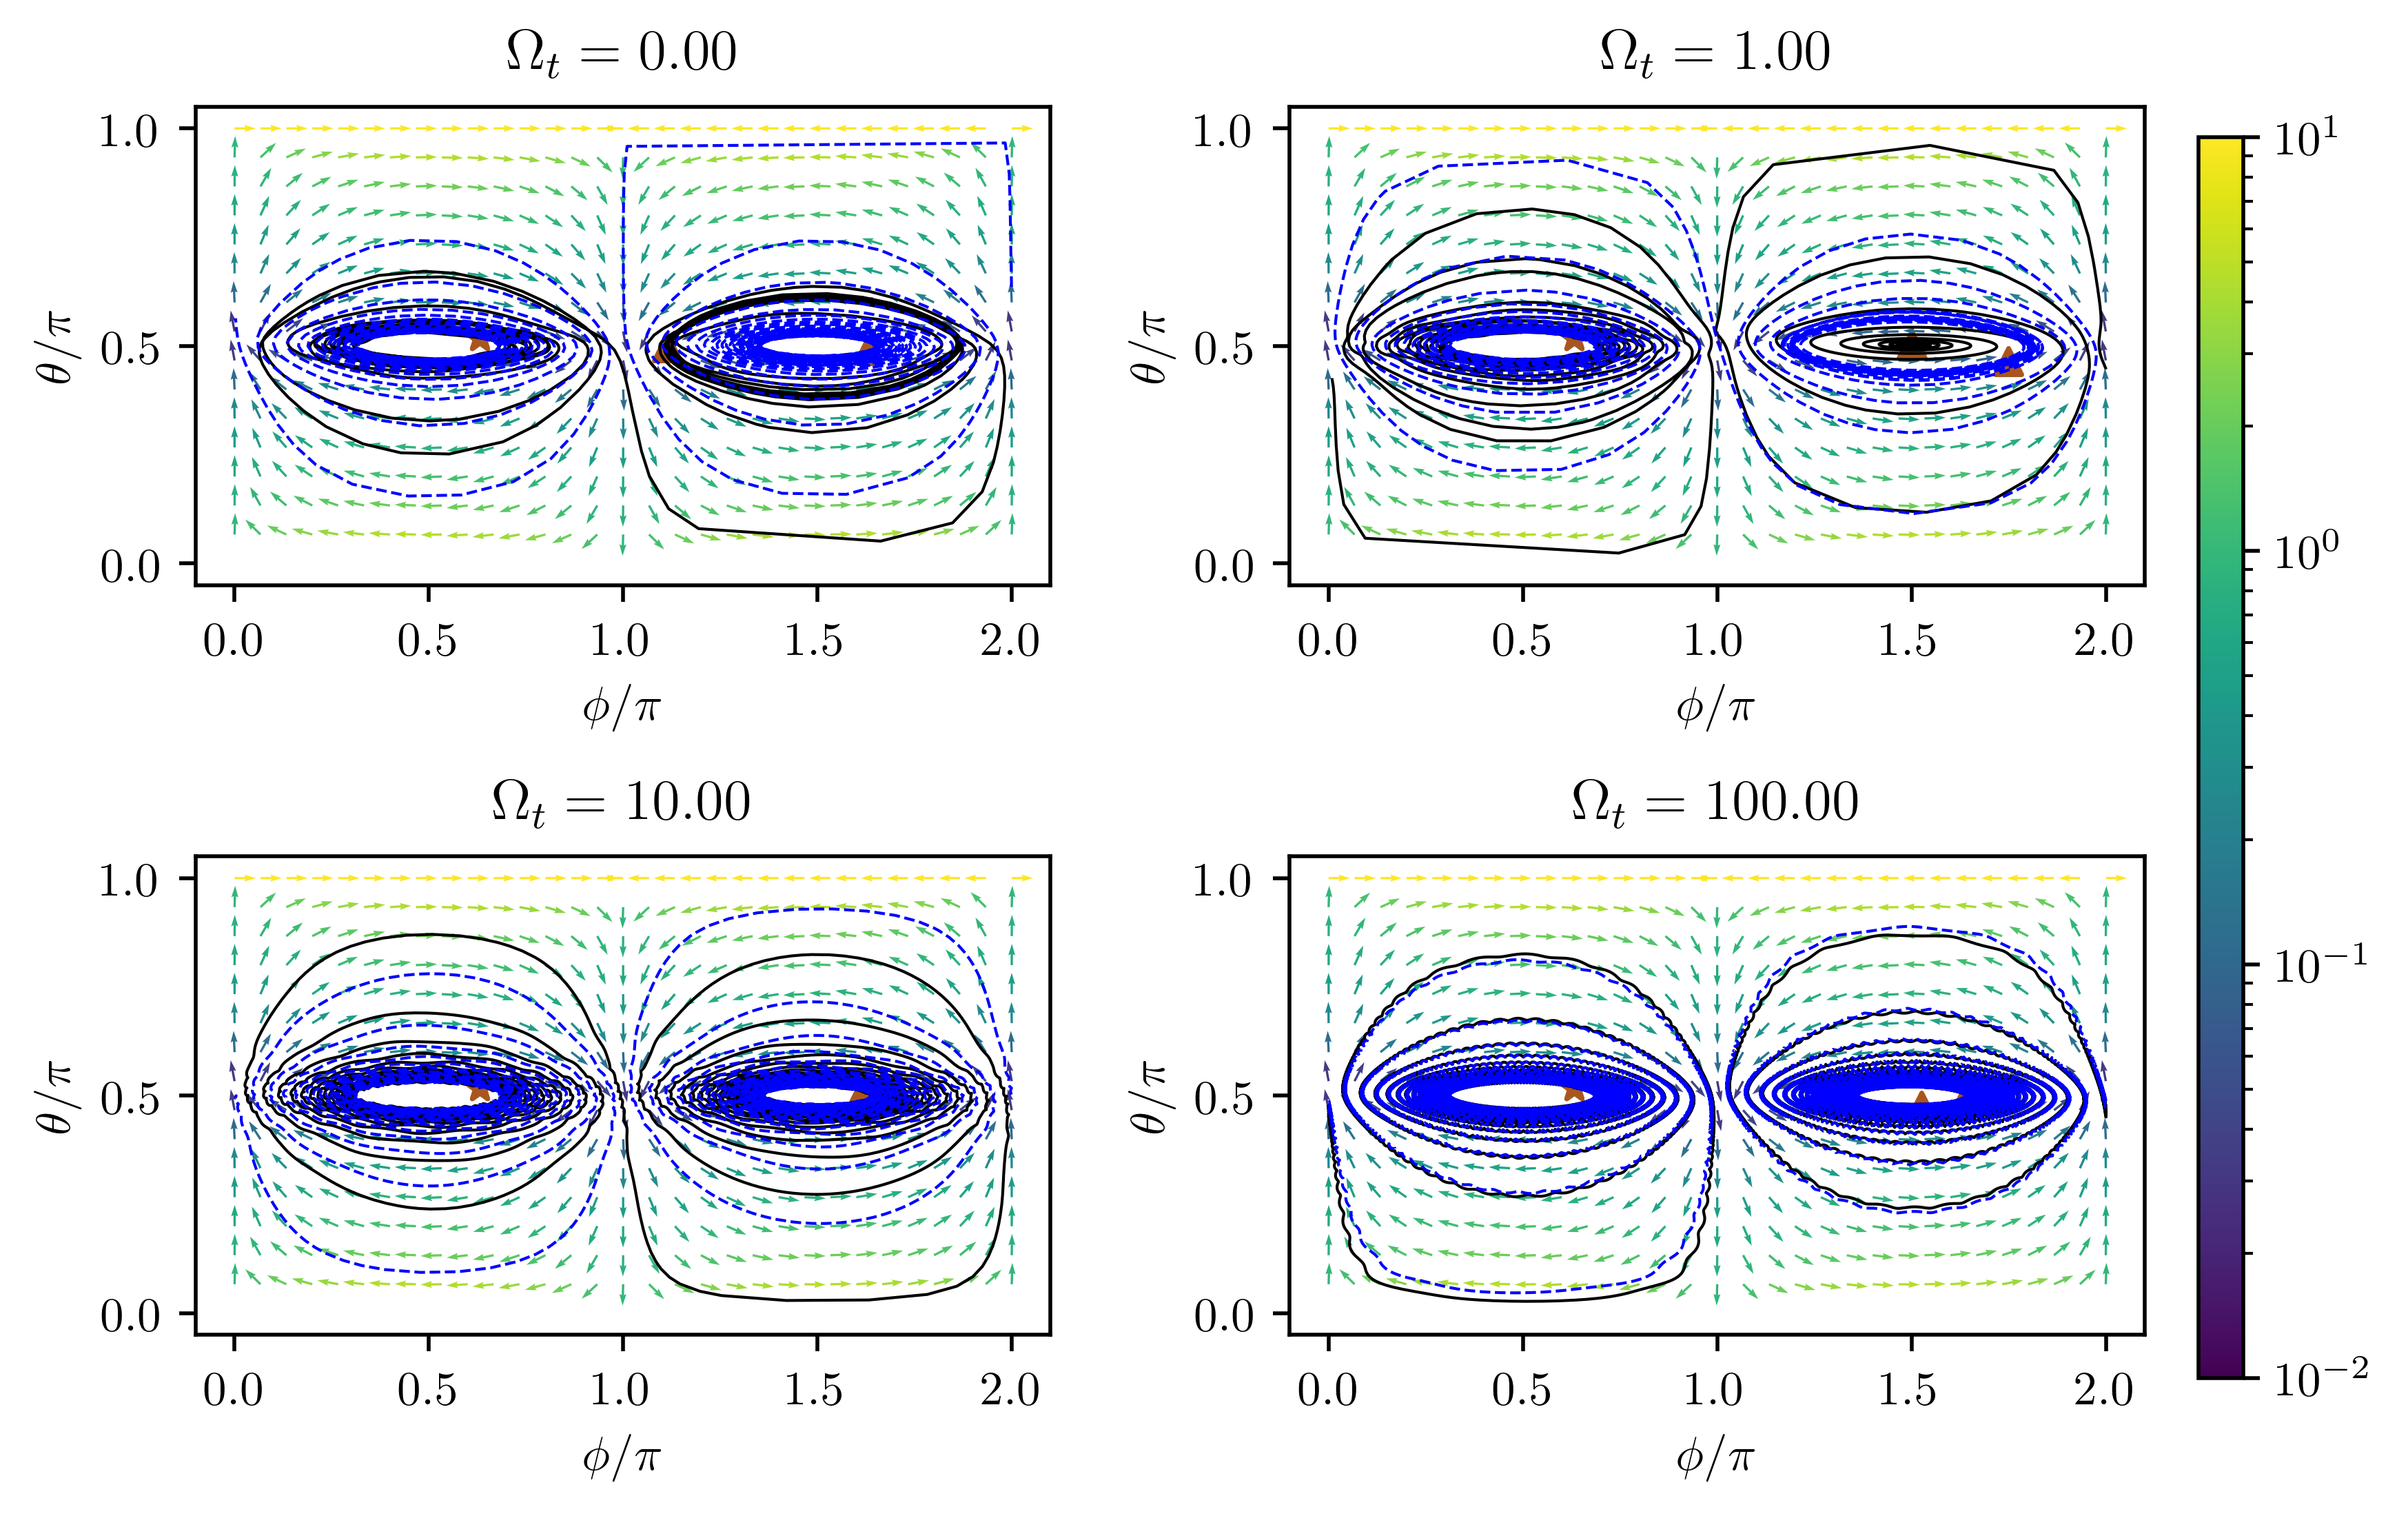

In [4]:
name_handel = 'ecoC01B05_baseFlow_a'
figsize = np.array((13, 9)) * 0.5
dpi = 500
vmin, vmax = 10 ** -2, 10 ** 1

pickle_name = 'datas/averange_chirality_%s.pickle' % name_handel
with open(pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
print('load pickle file to %s' % pickle_name)
omega_tail_list = pickle_dict['omega_tail_list']
tdata_list = pickle_dict['tdata_list']
phi = pickle_dict['phi']
theta = pickle_dict['theta']
dth = pickle_dict['dth']
dph = pickle_dict['dph']
dps = pickle_dict['dps']

norm_dthdph = np.sqrt(dth ** 2 + dph ** 2)
dth = dth / norm_dthdph
dph = dph / norm_dthdph
   
# # show, polar
# fig, axs = plt.subplots(1, 1, figsize=figsize, dpi=dpi, subplot_kw=dict(polar=True))
# fig.patch.set_facecolor('white')
# axi = axs
# cmap = plt.get_cmap('jet')
# norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
# axi.plot(Table_phi, Table_theta, '-k', alpha=0.2)
# im = axi.quiver(phi, theta, dph, dth, norm_dthdph, cmap=cmap, norm=norm)
# # im = axi.quiver(phi / np.pi, theta / np.pi, dph, dth, norm_dthdph, cmap=cmap, norm=norm)
# fig.colorbar(im, ax=axi)
# # axi.set_xlabel('$\\phi / \\pi$')
# # axi.set_ylabel('$\\theta / \\pi$')
# plt.tight_layout()

# show, standard
fig, axs = plt.subplots(2, 2, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')
axi = axs
cmap = plt.get_cmap('viridis')
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
for axi, omega_tail, (tdata1, tdata2) in zip(axs.ravel(), omega_tail_list, tdata_list):
    for tdata, linsty in zip((tdata1, tdata2), ('-k', '--b')):
        Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta = tdata
        axi.scatter(Table_phi[0] / np.pi, Table_theta[0] / np.pi, marker='*', s=30, c='r')
        axi.scatter(Table_phi[-1] / np.pi, Table_theta[-1] / np.pi, marker='^', s=30, c='r')
        for i0, i1 in spf_tb.separate_angle_idx(Table_phi):
            axi.plot(Table_phi[i0:i1] / np.pi, Table_theta[i0:i1] / np.pi, linsty, alpha=1, linewidth=0.6)
    im = axi.quiver(phi / np.pi, theta / np.pi, dph, dth, norm_dthdph, cmap=cmap, norm=norm)
    axi.set_xlabel('$\\phi / \\pi$')
    axi.set_ylabel('$\\theta / \\pi$')
    axi.set_title('$\\Omega_t = %.2f$' % omega_tail)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(im, cax=cax)


## toy model of large chirality

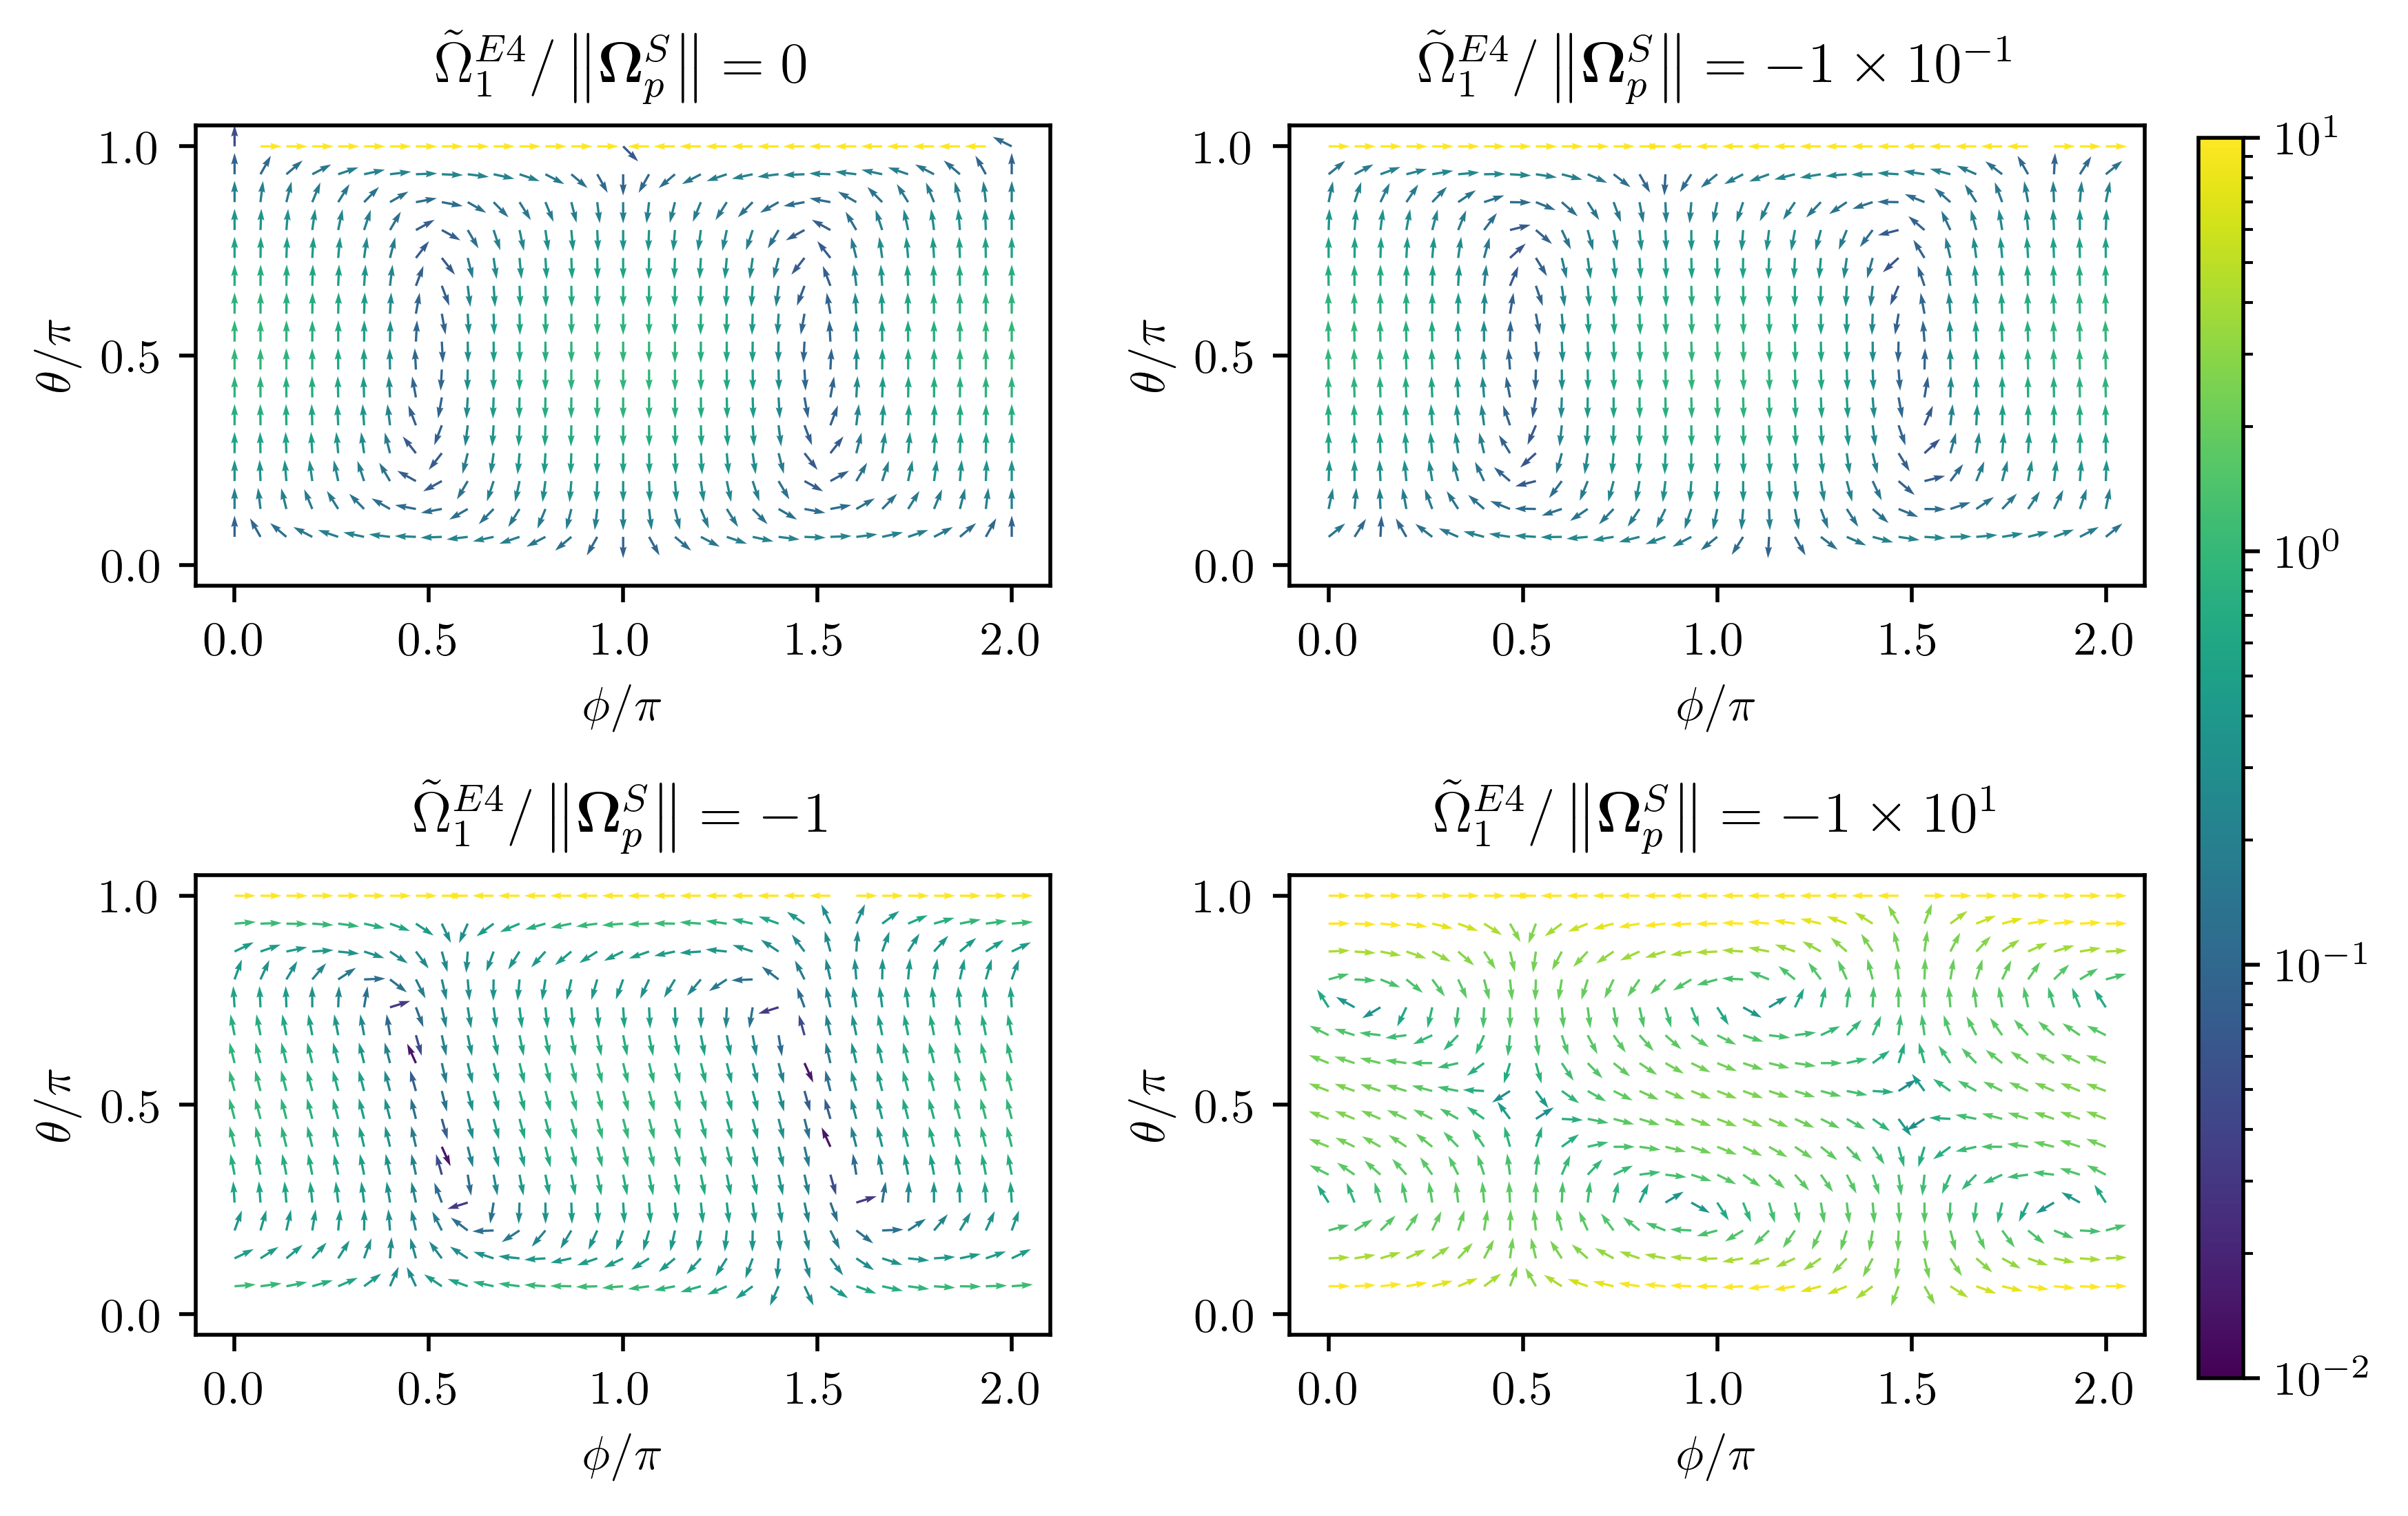

In [24]:
# full version
omega_fun = lambda theta, phi, psi, mywS, wE2z, wE4x, wE4y, wax, way, waz: np.array((-(np.sin(phi)*(way*np.cos(psi) + wax*np.sin(psi))) + np.cos(phi)*(wax*np.cos(psi)*np.cos(theta) - way*np.cos(theta)*np.sin(psi) + waz*np.sin(theta)) + (np.cos(phi)**2*np.cos(theta)*(wE2z + (-wE2z + wE4x)*np.cos(2*theta)) + wE4x*np.cos(theta)*np.sin(phi)**2 + wE4y*np.cos(phi)*np.sin(phi)*np.sin(theta)**2)/2.,mywS + np.cos(phi)*(way*np.cos(psi) + wax*np.sin(psi)) + np.sin(phi)*(wax*np.cos(psi)*np.cos(theta) - way*np.cos(theta)*np.sin(psi) + waz*np.sin(theta)) + (wE4y + 3*wE4y*np.cos(2*theta) - 2*(wE4y*np.cos(2*phi) + 2*(-wE2z + wE4x)*np.cos(theta)*np.sin(2*phi))*np.sin(theta)**2)/8.,((-2*wax*np.cos(psi) + np.cos(phi)*(wE2z + (wE2z - wE4x)*np.cos(2*theta)) + 2*way*np.sin(psi))*np.sin(theta))/2. + np.cos(theta)*(waz - (wE4y*np.sin(phi)*np.sin(theta))/2.)))
dthdphdps_fun = lambda theta, phi, psi, mywS, wE2z, wE4x, wE4y, wax, way, waz: np.array((way*np.cos(psi) + np.cos(phi)*(mywS + (wE4y*np.cos(2*theta))/2.) - (wE4x*np.cos(theta)*np.sin(phi))/2. + wax*np.sin(psi),-((2*mywS + wE4y)/np.tan(theta)*np.sin(phi))/2. - (1/np.sin(theta)*(2*wax*np.cos(psi) + wE4x*np.cos(phi)*np.cos(2*theta) - 2*way*np.sin(psi)))/2.,(4*waz + 4*wax*np.cos(psi)/np.tan(theta) + 2*np.cos(phi)*(wE2z + (-wE2z + wE4x)*np.cos(2*theta))/np.tan(theta) + wE4y*np.cos(theta)/np.tan(theta)*np.sin(phi) + 4*mywS/np.sin(theta)*np.sin(phi) + wE4y/np.sin(theta)*np.sin(phi) - 4*way/np.tan(theta)*np.sin(psi) - wE4y*np.sin(phi)*np.sin(theta))/4.))

mywS = 1 / 2 # simple shear
# wE2z, wE4x0, wE4y0 = 0.0126459, -0.01194913, 0.9581018 # ecoC01B05_baseFlow_avr
# wax, way, waz = -1.31786126e-03, -1.23559401e-03, -7.57100877e-01 # ecoC01B05_baseFlow_avr
wE2z, wE4x0, wE4y0 = 0, mywS, 1 * -0.9 # ecoC01B05_baseFlow_avr
wax, way, waz = 0, 0, 0 # ecoC01B05_baseFlow_avr
wE4x_fct_list = np.hstack((0, -0.1, -1, -10))
wE4y_fct_list = [1, ]
wt = 0

figsize = np.array((13, 9)) * 0.5
dpi = 500
vmin, vmax = 10 ** -2, 10 ** 1
theta = np.linspace(0, 1, 16) * np.pi
phi = np.linspace(0, 2, 31) * np.pi
theta, phi = np.meshgrid(theta, phi)

fig, axs = plt.subplots(2, 2, figsize=figsize, dpi=dpi, constrained_layout=False)
fig.patch.set_facecolor('white')
cmap = plt.get_cmap('viridis')
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
wE4x_fct_list, wE4y_fct_list = np.meshgrid(wE4x_fct_list, wE4y_fct_list)
for axi, wE4x_fct, wE4y_fct in zip(axs.ravel(), wE4x_fct_list.ravel(), wE4y_fct_list.ravel()):
    wE4x = wE4x0 * wE4x_fct
    wE4y = wE4y0 * wE4y_fct
    dth, dph, dps = dthdphdps_fun(theta, phi, 0, mywS, wE2z, wE4x, wE4y, wax * wt, way * wt, waz * wt)
    norm_dthdph = np.sqrt(dth ** 2 + dph ** 2)
    dth = dth / norm_dthdph
    dph = dph / norm_dthdph
    im = axi.quiver(phi / np.pi, theta / np.pi, dph, dth, norm_dthdph, cmap=cmap, norm=norm)
    axi.set_xlabel('$\\phi / \\pi$')
    axi.set_ylabel('$\\theta / \\pi$')
    axi.set_title('$\\tilde \\Omega_1^{E4} / \\left\\lVert \\bm \\Omega_p^S \\right\\rVert = \\num{%.0e}$' % (wE4x / mywS))
plt.tight_layout()
    
cax = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(im, cax=cax)